<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:

> Neural networks consist of layers of neurons.  An input layer is the one that directly interacts with the input features.

### Hidden Layer:

> Hidden layers are all layers in the middle of the network.  They are "hidden" because nothing outside of the neural network interacts with them.

### Output Layer:

> The output layer is the final layer, and gives the final prediction.  It can either have nodes that give continuous variables, or the nodes can have probabilities for a classification problem.

### Neuron:

> Neurons, also known as nodes, are individual operations within a layer.  A layer can have 1 or more neurons.

### Weight:

> Weight is a floating point value that neurons multiply their input by.  Each neuron will have a single weight value.

### Activation Function:

> The activation function is the specific formula used by a layer.  Common functions are sigmoid, tanh, step, and relu.

### Node Map:

> A representation of the connections that each node (or neuron) has.

### Perceptron:

> A simple neural network that acts as a binary classifier.  We implement a single layer perceptron here since it has no hidden layers.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [0]:
##### Your Code Here #####

# Add a column of 1's for our bias calculation
df['bias'] = [1.0] * 4

# Define inputs and target output
X = np.array(df[['x1', 'x2', 'bias']])
Y = np.array(df[['y']])

In [0]:
X

array([[0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [0]:
# Define sigmoid activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [0]:
# Define relu activation functions
def relu(x):
    return x * (x > 0)

def relu_derivative(x):
    return 1 * (x > 0)

In [0]:
test = [[-2, -1],
        [0, 1],
        [2, 3]]
relu(np.array(test))

array([[0, 0],
       [0, 1],
       [2, 3]])

In [0]:
relu_derivative(np.array(test))

array([[0, 0],
       [0, 1],
       [1, 1]])

In [0]:
# Initialize weights randomly
import numpy as np

# creates an array of shape (3,1), with values between -1 and 1
weights = 2 * np.random.random((3,1)) - 1
weights

array([[-0.56946355],
       [-0.90409687],
       [ 0.02571801]])

In [0]:
# Set up a loop for the learning iterations
max_epochs = 10000
target_error = .01 # since 99% accuracy was specified

# ensure weights are initialized
weights = 2 * np.random.random((3,1)) - 1

for iteration in range(max_epochs):
    
    # Get the weighted sum of inputs / weights
    weighted_sum = np.dot(X, weights)
    
    # Apply the activation function
    activated_output = sigmoid(weighted_sum)
    #activated_output = relu(weighted_sum)
    
    # Calculate error
    error = Y - activated_output
    #print("error\n", error)
    
    # If error is low enough, break the loop early
    if (error ** 2).mean() < target_error:
        break
    
    # Update the weights
    adjustments = error * sigmoid_derivative(weighted_sum)
    #adjustments = error * relu_derivative(weighted_sum)
    
    weights += np.dot(X.T, adjustments)

print(f"Weights after {iteration} iterations")
print(weights)

print("Output after training")
print(activated_output)

print("Mean absolute error after training")
print((error ** 2).mean())

Weights after 302 iterations
[[-4.02097896]
 [-4.02099492]
 [ 6.13412423]]
Output after training
[[0.99783707]
 [0.89217428]
 [0.89217274]
 [0.12922263]]
Mean absolute error after training
0.00998906706135863


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
diabetes.shape

(768, 9)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X_diab = Normalizer().transform(diabetes[feats])
X_diab.shape

(768, 8)

In [0]:
X_diab[:5]

array([[0.03355237, 0.82762513, 0.40262844, 0.19572216, 0.        ,
        0.18789327, 0.00350622, 0.27960308],
       [0.008424  , 0.71604034, 0.55598426, 0.24429612, 0.        ,
        0.22407851, 0.00295683, 0.26114412],
       [0.04039768, 0.92409698, 0.32318146, 0.        , 0.        ,
        0.11765825, 0.00339341, 0.16159073],
       [0.00661199, 0.58846737, 0.43639153, 0.15207584, 0.62152733,
        0.185797  , 0.0011042 , 0.13885185],
       [0.        , 0.5963863 , 0.17412739, 0.15236146, 0.73133502,
        0.18762226, 0.00996009, 0.14365509]])

In [0]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, epochs = 10, lrate=.01):
        self.epochs = epochs
        self.lrate = lrate
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)
    
    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # initialize weights
        self.weight = np.random.random(1 + X.shape[1])

        # Number of misclassifications
        # (tracking errors for the visualization, not part of the actual perceptron)
        self.errors = []

        for i in range(self.epochs):
          err = 0
          for xi, target in zip(X, y):
            # make a prediction, get the error from that, and multiply learning rate
            delta_w = self.lrate * (target - self.predict(xi))
            
            # update weights based on the error
            self.weight[1:] += delta_w * xi
            self.weight[0] += delta_w
            
            err += int(delta_w != 0.0)
          self.errors.append(err)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # returns the weighted input
        weighted_input = np.dot(X, self.weight[1:]) + self.weight[0]
        return self.__sigmoid(weighted_input)
        #return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        """ Default Step Function"""
        # decides class label
        return np.where(self.net_input(X) >= 0.5, 1, 0)

In [0]:
# define X and y
X_diab = Normalizer().transform(diabetes[feats])
y_diab = np.array(diabetes['Outcome'])

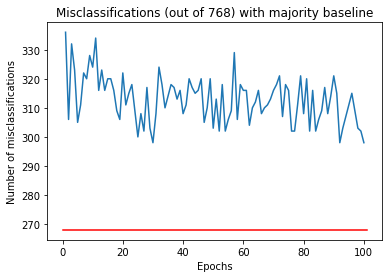

In [0]:
# Run it on the diabetes data
import matplotlib.pyplot as plt

pn = Perceptron(epochs=100, lrate=1)
pn.fit(X_diab, y_diab)
#plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.plot(range(1, len(pn.errors) + 1), pn.errors)

baseline = diabetes['Outcome'].value_counts()[1]
plt.plot([0,len(pn.errors) + 1], [baseline]*2, color='red')

plt.title(f'Misclassifications (out of {len(y_diab)}) with majority baseline')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [0]:
diabetes['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

It looks like it's doing something here, but 384 correct classifications would be 50% accuracy.  The majority baseline would be 268 misclassifications, shown by the red line.

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?